In [1]:
from dolfin import *
from dolfin_adjoint import *
# import pygmsh_mesh_functions
# from pygmsh_mesh_functions import *
import meshio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import hsv_to_rgb
from tqdm import tqdm


In [2]:
# list available samples
from os import listdir
meshpath = './resultstester_GAP/'
mesh_list = [x for x in listdir(meshpath) if x.endswith('.xdmf')]
mesh_list

['2hole.xdmf',
 '2notch.xdmf',
 'AG03.xdmf',
 'example_2fold.xdmf',
 'example_3fold.xdmf',
 'example_network_2fold.xdmf',
 'example_network_3fold.xdmf',
 'GWO72.xdmf',
 'HarmH27.xdmf',
 'test_array_circle.xdmf',
 'test_array_ellipse.xdmf',
 'test_clover.xdmf',
 'test_clover_rand.xdmf',
 'test_dumbell.xdmf',
 'test_dumbell_45.xdmf',
 'test_dumbell_BF3.xdmf',
 'test_loop_array_2fold.xdmf',
 'test_loop_array_3fold.xdmf',
 'test_NPR.xdmf',
 'test_NPR_rounded.xdmf',
 'test_NPR_rounded_45.xdmf',
 'test_NPR_rounded_90.xdmf',
 'test_NPR_rounded_h.xdmf',
 'test_NPR_rounded_rand.xdmf',
 'test_NPR_rounded_swivel.xdmf',
 'test_NPR_rounded_v.xdmf',
 'test_simplehole_discA1.xdmf',
 'test_simplehole_discA2.xdmf',
 'test_simplehole_discB1.xdmf',
 'test_simplehole_ellipseA12.xdmf',
 'test_simplehole_rectangleA12.xdmf',
 'test_simplehole_squareA1.xdmf',
 'test_simplehole_squareA2.xdmf',
 'test_simplehole_squareB1.xdmf',
 'test_simplehole_triangleAl.xdmf',
 'test_withouthole.xdmf']

1387 elements in mesh


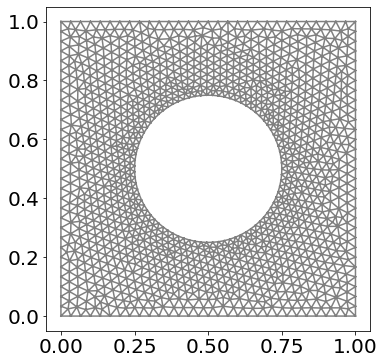

In [3]:
meshfile = 'test_simplehole_discA1.xdmf'                    # with .xdmf
meshpath = './output_files/'
sample_height=1     #IMPORTANT TO CHECK       #height of the sample in the mesh file (m)
Lx=1
Ly=1

mesh = Mesh()
with XDMFFile(meshpath+meshfile) as xdmf_infile:
    xdmf_infile.read(mesh)
n_elements = mesh.coordinates().shape[0]
print(str(n_elements)+" elements in mesh")

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plot(mesh)
# ax.set_xlabel('$(\epsilon_x - \epsilon_y)/2$',fontsize=24)
# ax.set_ylabel('$\epsilon_{xy}$',fontsize=24)
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
# plt.savefig('example_mesh.png', dpi=96)

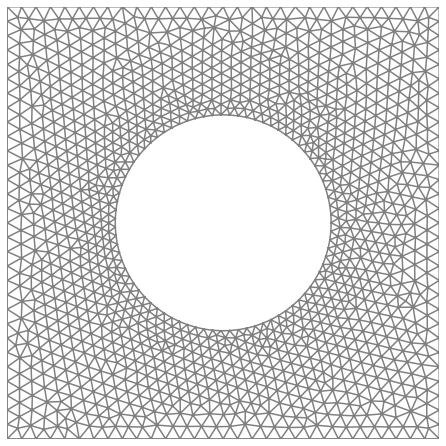

In [4]:
sample_height=1     #IMPORTANT TO CHECK       #height of the sample in the mesh file (m)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plot(mesh)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_position([0, 0, 1, 1])
plt.savefig('example_mesh_borderless.png', dpi=96)

In [5]:
# load data
datapath = './resultstester_GAP/'+meshfile+'/'
mesh = meshio.read(datapath+'stess000000.vtu')
m_point = mesh.points
m_cell = mesh.cells[0].data
m_value = mesh.point_data

In [6]:
# Compute polar coordinate in stress space
sigma_xx = m_value['$\\sigma$'][:,0]
sigma_yy = m_value['$\\sigma$'][:,4]
sigma_xy = m_value['$\\sigma$'][:,1]

coord       = [(sigma_xx-sigma_yy)/2,sigma_xy]
r           = np.sqrt(coord[0]**2+coord[1]**2)
phi         = np.arctan2(sigma_xy,(sigma_xx-sigma_yy)/2)
phi[phi<0]+=2*np.pi
# coord_polar = np.array([r,phi]).T

color_hsv = np.array([phi/(np.pi*2),np.ones_like(phi),np.ones_like(phi)]).T
color_rgb = hsv_to_rgb(color_hsv)

r_norm = r/np.max(r)

phi_cell = np.array([phi[x] for x in m_cell[:,0]])
r_cell = np.array([r_norm[x] for x in m_cell[:,0]])

In [7]:
phi_cell

array([5.30052908, 2.90272839, 3.19526825, ..., 5.32177079, 4.85846158,
       3.27841095])

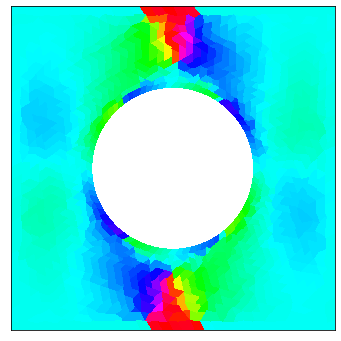

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, phi_cell, vmin=0, vmax=2*np.pi,
                   shading='flat', cmap='hsv')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
pngname = datapath+'phi.png'
plt.savefig(pngname, dpi=96)

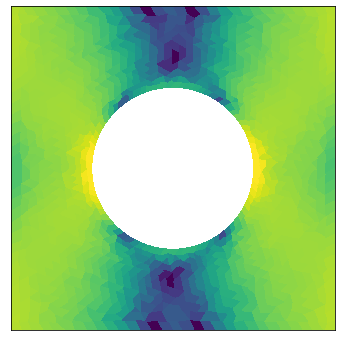

In [14]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

# tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, r_cell, vmin=0, vmax=1,
#                    shading='flat', cmap='viridis')
tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, np.log10(r_cell), vmin=-2, vmax=0,
                   shading='flat', cmap='viridis')
#                    shading='flat', cmap='bwr')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
pngname = datapath+'r.png'
# pngname = datapath+'r_bwr.png'
plt.savefig(pngname, dpi=96)

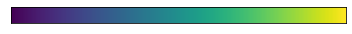

In [10]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='viridis')
plt.show()

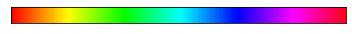

In [11]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='hsv')
plt.show()

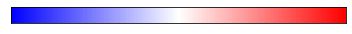

In [12]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='bwr')
plt.show()